# Performance - Metrics Analysis

In [1]:
from config import PathConfig

from os.path import join
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
metrics_df = pd.read_csv(join(PathConfig.experiment_results_path.value, 'dqn_agent','agent_tuning_results.csv'), index_col=None)
metrics_df.head()

,Index,Architecture,Hyperparameters,Average Reward,Average Epsilon
0,0,SimpleDQN,"{'gamma': 0.99, 'epsilon': 1.0, 'epsilon_min':...",-2.733333,0.030816
1,1,SimpleDQN,"{'gamma': 0.9, 'epsilon': 1.0, 'epsilon_min': ...",-17.133333,0.016175
2,2,SimpleDQN,"{'gamma': 0.95, 'epsilon': 1.0, 'epsilon_min':...",7.400000,0.010753
3,3,SimpleDQN,"{'gamma': 0.98, 'epsilon': 1.0, 'epsilon_min':...",-8.200000,0.039447
4,4,SimpleDQN,"{'gamma': 0.99, 'epsilon': 1.0, 'epsilon_min':...",3.133333,0.155025


In [18]:
hyperparameters = metrics_df['Hyperparameters'].to_dict()
hyperparameters = {k: eval(v) for k, v in hyperparameters.items()}
hyperparameters_df = pd.DataFrame(hyperparameters).T
tuning_df = metrics_df.copy().drop(columns=['Hyperparameters'])
tuning_df = pd.concat([hyperparameters_df, tuning_df], axis=1)
tuning_df.to_csv('agent_tuning_results.csv', index=False)
tuning_df

,gamma,epsilon,epsilon_min,epsilon_decay,lr,memory_size,Index,Architecture,Average Reward,Average Epsilon
0,0.99,1.0,0.010,0.995,0.0010,10000.0,0,SimpleDQN,-2.733333,0.030816
1,0.90,1.0,0.010,0.990,0.0005,5000.0,1,SimpleDQN,-17.133333,0.016175
2,0.95,1.0,0.010,0.980,0.0007,7000.0,2,SimpleDQN,7.400000,0.010753
3,0.98,1.0,0.020,0.995,0.0010,8000.0,3,SimpleDQN,-8.200000,0.039447
4,0.99,1.0,0.005,0.999,0.0003,12000.0,4,SimpleDQN,3.133333,0.155025
5,0.95,1.0,0.020,0.980,0.0005,6000.0,5,SimpleDQN,-8.066667,0.020289
6,0.90,1.0,0.015,0.995,0.0010,10000.0,6,SimpleDQN,7.933333,0.035151
7,0.99,1.0,0.010,0.997,0.0008,11000.0,7,SimpleDQN,4.066667,0.051414
8,0.99,1.0,0.010,0.995,0.0010,10000.0,0,ComplexDQN,2.333333,0.030816
9,0.90,1.0,0.010,0.990,0.0005,5000.0,1,ComplexDQN,-4.866667,0.016175


In [13]:
# metrics_df[metrics_df.groupby('sequence_length')['accuracy'].transform(max) == metrics_df['accuracy']]
metric_name = 'Average Reward'
tuning_df[tuning_df[metric_name] == tuning_df[metric_name].max()]

,gamma,epsilon,epsilon_min,epsilon_decay,lr,memory_size,Index,Architecture,Average Reward,Average Epsilon
10,0.95,1.0,0.01,0.98,0.0007,7000.0,2,ComplexDQN,11.866667,0.010753


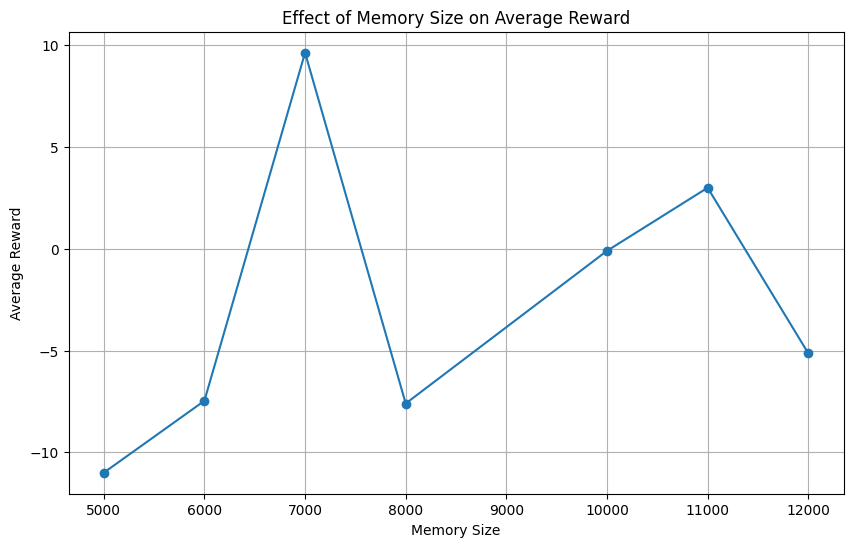

In [19]:
# Group by memory_size and calculate the mean Average Reward for each memory_size
memory_size_avg_reward = tuning_df.groupby('memory_size')['Average Reward'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(memory_size_avg_reward['memory_size'], memory_size_avg_reward['Average Reward'], marker='o')
plt.xlabel('Memory Size')
plt.ylabel('Average Reward')
plt.title('Effect of Memory Size on Average Reward')
plt.grid(True)
plt.show()

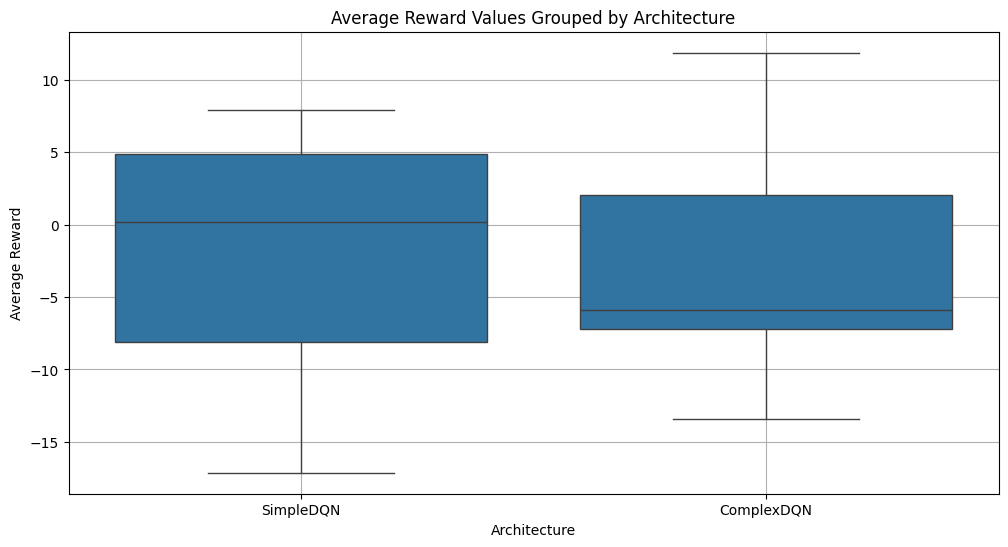

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the different Average Reward values grouped by the two architectures
plt.figure(figsize=(12, 6))
sns.boxplot(data=tuning_df, x='Architecture', y='Average Reward')
plt.xlabel('Architecture')
plt.ylabel('Average Reward')
plt.title('Average Reward Values Grouped by Architecture')
plt.grid(True)
plt.show()

### Plot the impact of different hyperparameters on validation accuracy, precision, recall, and F1 score

In [ ]:
validation_metrics_df = metrics_df.copy()
# Plot the impact of different hyperparameters on validation accuracy, precision, recall, and F1 score
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot for accuracy
sns.scatterplot(data=validation_metrics_df, x='num_filters', y='accuracy', hue='num_layers', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Impact of Number of Filters and Layers on Accuracy')
axs[0, 0].set_xlabel('Number of Filters')
axs[0, 0].set_ylabel('Accuracy')

# Plot for precision
sns.scatterplot(data=validation_metrics_df, x='num_filters', y='precision', hue='num_layers', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Impact of Number of Filters and Layers on Precision')
axs[0, 1].set_xlabel('Number of Filters')
axs[0, 1].set_ylabel('Precision')

# Plot for recall
sns.scatterplot(data=validation_metrics_df, x='num_filters', y='recall', hue='num_layers', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Impact of Number of Filters and Layers on Recall')
axs[1, 0].set_xlabel('Number of Filters')
axs[1, 0].set_ylabel('Recall')

# Plot for F1 score
sns.scatterplot(data=validation_metrics_df, x='num_filters', y='f1', hue='num_layers', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Impact of Number of Filters and Layers on F1 Score')
axs[1, 1].set_xlabel('Number of Filters')
axs[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

### Create scatter plots for sequence length vs. performance metrics

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot for accuracy
sns.scatterplot(data=validation_metrics_df, x='sequence_length', y='accuracy', ax=axs[0, 0])
axs[0, 0].set_title('Sequence Length vs. Accuracy')
axs[0, 0].set_xlabel('Sequence Length')
axs[0, 0].set_ylabel('Accuracy')

# Plot for precision
sns.scatterplot(data=validation_metrics_df, x='sequence_length', y='precision', ax=axs[0, 1])
axs[0, 1].set_title('Sequence Length vs. Precision')
axs[0, 1].set_xlabel('Sequence Length')
axs[0, 1].set_ylabel('Precision')

# Plot for recall
sns.scatterplot(data=validation_metrics_df, x='sequence_length', y='recall', ax=axs[1, 0])
axs[1, 0].set_title('Sequence Length vs. Recall')
axs[1, 0].set_xlabel('Sequence Length')
axs[1, 0].set_ylabel('Recall')

# Plot for F1 score
sns.scatterplot(data=validation_metrics_df, x='sequence_length', y='f1', ax=axs[1, 1])
axs[1, 1].set_title('Sequence Length vs. F1 Score')
axs[1, 1].set_xlabel('Sequence Length')
axs[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

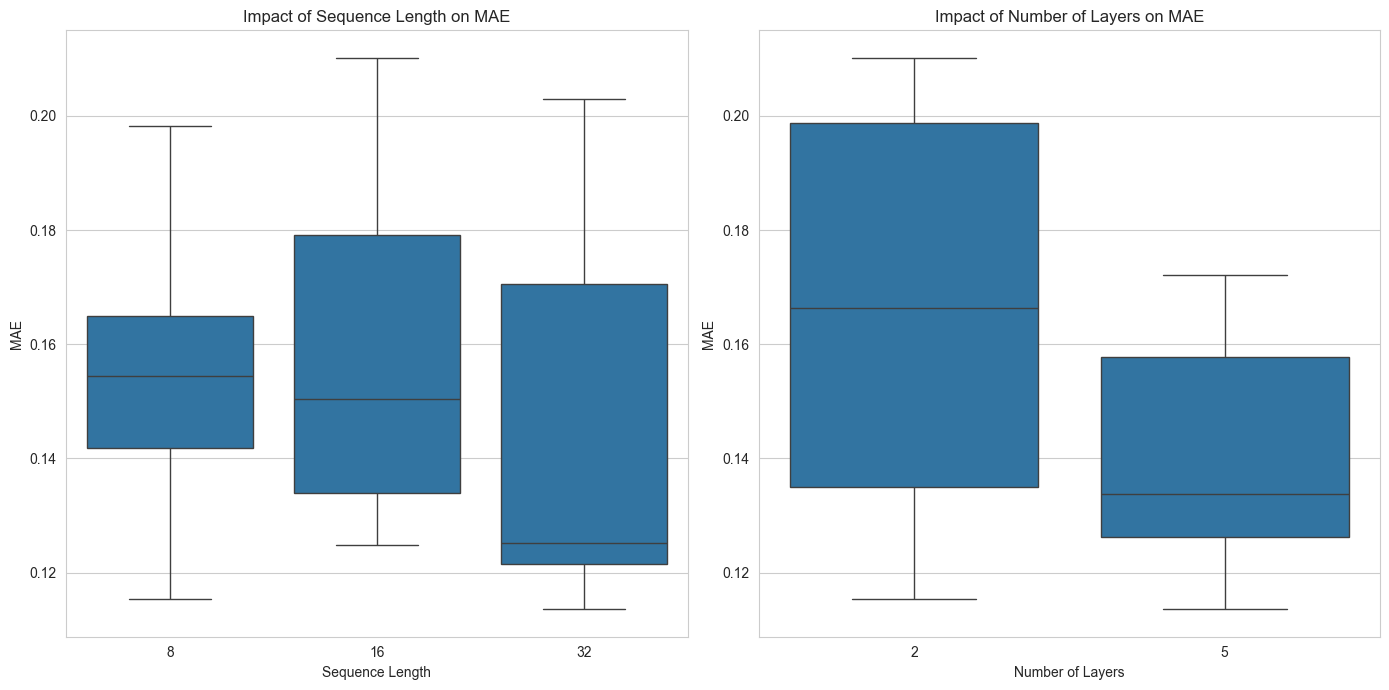

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))

# Sequence length vs MAE
plt.subplot(1, 2, 1)
sns.boxplot(x='sequence_length', y='mae', data=metrics_df)
plt.title('Impact of Sequence Length on MAE')
plt.xlabel('Sequence Length')
plt.ylabel('MAE')

# Number of layers vs MAE
plt.subplot(1, 2, 2)
sns.boxplot(x='num_layers', y='mae', data=metrics_df)
plt.title('Impact of Number of Layers on MAE')
plt.xlabel('Number of Layers')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()